In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Graphique
Le module matplotlib est utile pour afficher des grapqhiques. Lorsqu'on cherche à compdrendre un ensemble de données en 1 ou 2 dimensions, il est utiles de les afficher. Voici 3 différentes fonctions d'affichage:

- plt.hist()
- plt.plot()
- plt.scatter()


et 3 différents types de données. Utiliser la méthode d'affichage approprié pour afficher chaque type de donnée, afficher le titre du graphique et nommez les axes. Expliquer pourquoi vous avez choisi cette fonction.

### Code à compléter
Produisez un graphique par cellule.

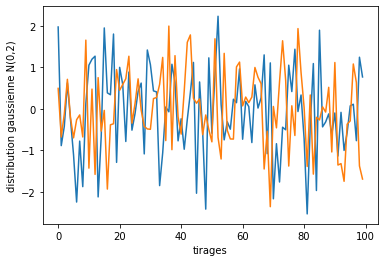

In [2]:
# Échantillon d'une distirubtion Gaussienne 2D
XY=np.random.multivariate_normal(np.array([0,0]),np.identity(2),size=100)
plt.plot(XY)
plt.xlabel('tirages')
plt.ylabel('distribution gaussienne N(0,2)')
plt.show()

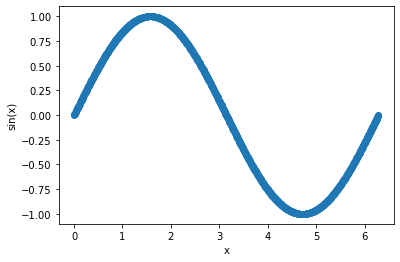

In [3]:
# Une courbe sinusoïdale
X=np.linspace(0,2*np.pi,1000)
Y=np.sin(X)
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

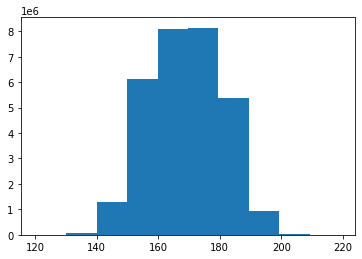

In [4]:
# Grandeur des canadiens adultes (synthétique)
X_male=np.random.normal(178,7.5,15000000)
X_female=np.random.normal(160,7.5,15000000)
X=np.concatenate((X_male,X_female))
X=X[X>0]

plt.hist(X,10)

plt.show()

### Explication

# Lecture, affichages et sauvegarde d'images

Cette section contient quelques échantillons de code démontrant des maniuplations de bases des images à l'aide d'openCV. Lire et exécuter le code puis répondre aux questions plus bas.

Ici on montre deux méthodes d'affichage d'image, deux images sont affichées avec plt et une avec cv2. (Vous devez fermer la nouvelle fenêtre d'image pour continuer l'exécution du programme.)

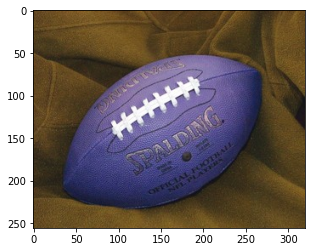

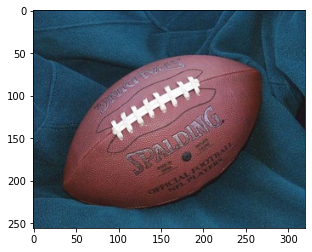

In [5]:
img = cv2.imread('./images_et_fichier/football.jpg')
plt.imshow(img)
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows() 

Lecture d'une image en niveau de gris avec cv2.IMREAD_GRAYSCALE », un "ImreadFlags".
https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html

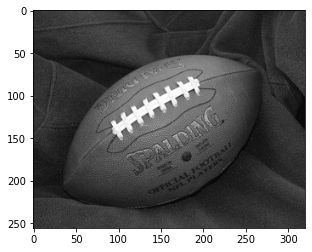

In [6]:
gray_img = cv2.imread('./images_et_fichier/football.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img,cmap='gray')
plt.show()

Enregistrement d'une image

In [7]:
cv2.imwrite('./images_et_fichier/output.jpg', gray_img)

True

In [9]:
cv2.imwrite('./images_et_fichier/output_png.png',img) 

True

### Questions
1.  *Donner le type de la variable «img».*
2.  *Décrivez les fonctions « imread , waitKey».*
3.  *Nommez 2 différences entre « cv2.imshow » et « plt.imshow »*
4. *Pourquoi un des ballons est violet?*
4. *Comment faire pour changer le format de l’image enregistrée ? Donner la commande complète pour sauvegarder l’image en format PNG. (Indice : utiliser les « ImwriteFlags »)*

### Réponses
1.  numpy.ndarray
2.  imread: lire une image, waitKey: permet d'afficher une fenêtre pour un temps donné ou avant qu'une touche soit pressée
3.  « cv2.imshow » assume que l'image est stockée au format BGR alors que « plt.imshow » assume qu'elle est stockée au format RGB. « cv2.imshow » ouvre l'image dans une nouvelle fenêtre.
4.  Un des ballons est percu bleu car les canaux sont inversés : BGR est lu comme RGB, le rouge du ballon devient donc bleu et inversement.
5.  cv2.imwrite('./images_et_fichier/output.png',img) 

# Transformations géométriques

OpenCV offre deux fonctions pour faire des transformations sur les images cv2.warpAffine et cv2.warpPerspective.  cv2.warpAffine prend une matrice de transformation de dimension 2x3 comme entrée alors que cv.warpPerspective prend une matrice de dimension 3x3.  Créer un programme qui positionne le ballon de football de l’image « football.jpg » à la verticale (visuellement) et affiche le résultat.
(https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html)


### Code à écrire

In [11]:
ballon = cv2.imread('./images_et_fichier/football.jpg')
cv2.imshow('image',ballon)
cv2.waitKey()

-1

# Détection des contours
Dans cette section vous devrez comparer les résultats de deux algorithmes de détection de contours sur la même image. Créer un programme qui extrait le contour de « footballs.jpg » avec les deux algorithmes mentionnés plus bas, les affiche et décrire brièvement les étapes de chaque algorithmes.

Algorithme de Canny
(https://docs.opencv.org/master/da/d22/tutorial_py_canny.html)

Algorithme de Sobel
(https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html)

### Code à écrire

### Réponse

# Détection et suivit des visages
Utilisez un des lien plus bas (au choix) pour vous informer sur l’algorithme viola-Jones. Ensuite, utilisez le code fourni pour encadrer et détecter les visages de l’images « group.jpg ». Finalement répondre à la question.

Article Viola-Jones : (https://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf)

Tutoriel : (https://levelup.gitconnected.com/face-detection-with-python-using-opencv-5c27e521c19a)


In [ ]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
haar_cascade_face = cv2.CascadeClassifier('./images_et_fichier/haarcascade_frontalface_alt2.xml')


#  Loading the image to be tested


def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy
 
#  Loading the image to be tested
test_image = cv2.imread('./images_et_fichier/group.jpg')
    
#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

### Question
*Qu’est-ce qu’une image intégrale? En quoi est-ce utile?*

### Réponse

# Extraction des caractéristiques locales 
Commencer par lire la documentation sur les point-clé SIFT : (https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) 

Ensuite exécutez le code plus bas. Celui-ci extrait les point-clés de deux images et affiche une correspondance visuelle entre les points-clés des deux images. Vous devez écrire un algorithme, basé sur le script en exemple, qui estime la translation (en pixel) entre le livre de l’image 1 et celui de l’image 2. Le programme doit imprimer la translation à la fin. La qualité de la solution est évalué.

•	Expliquer votre solution

Conseils :
1.	Chaque objet KeyPoint contient sa position dans le champ pt
2.	Les lignes vertes présentes sur l’image généré représentent visuellement les match approuvé contenu dans la liste « matches »
3.	Chaque objet Dmatch contient un match de point-clé entre img1 et img2. Le champ queryIdx contient l’index du point-clé dans l’img1 et le champ trainIdx contient l’index du point-clé dans l’img2.
4.	On peut avoir la translation du match k1-k2 en faisant « trans=k2.pt-k1.pt »
5.	Ce ne sont pas tous les matchs qui sont utiles pour calculer la translation, on s’intéresse uniquement aux point-clés sur le livre.


In [ ]:
img1 = cv2.imread('./images_et_fichier/livre1.jpg')
img2 = cv2.imread('./images_et_fichier/livre2.jpg')


# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#Le champ .pt des object KeyPoint contiennent la position du point-cle

img1=cv2.drawKeypoints(img1,kp1,None)
img2=cv2.drawKeypoints(img2,kp2,None)
cv2.imwrite('./images_et_fichier/sift_keypoints1.jpg',img1)
cv2.imwrite('./images_et_fichier/sift_keypoints2.jpg',img2)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

#knnMatch retourne les 2 plus proche voisin pour chaque membre de des1
matches = flann.knnMatch(des1,des2,k=2)
#Les objects DMatch contiennent index de du point-cle de ds1 match dans le champ queryIdx
#et l'index du point-cle appartenant a des2 dans le champ trainIdx

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper,
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

### Code à écrire

### Explication